# Intro to Geospatial Data using Python

## Disclaimer
* Not a GIS expert, just someone with the drive to self learn.
* Going to be talking mostly about Shape (.shp) files but other formats exist (geojson, raster, etc)
* Using Python 3.5, no guarantees everything works on 2.7

## Background
* What is GeoSpatial Data?
* Types of GeoSpatial Data
* What kinds of GeoSpatial Data is available?
* Where to get data?

## Technical
* Getting Set Up
* Reading in Data
* Exploring Data
    * Fields
    * Profiling
    * Visualization
* Filtering
    * Data Attributes
    * Geodesic Features
* Geodesic transformations
    * Units of Measure
    * Projections
* Geodesic Calculations
    * Centroid
    * Area
    * Perimeter
    * Distance between points
* Joins/merges
    * Joining tabular data
    * Joining on geodesic features
* Creating new data
    * New Fields
    * New Shapes
* Writing Data

## What is GeoSpatial Data?
The word geospatial is used to indicate that data that has a geographic component to it.  This means that the records in a dataset have locational information tied to them such as geographic data in the form of coordinates, address, city, or ZIP code. GIS data is a form of geospatial data.  Other geospatial data can originate from GPS data, satellite imagery, and geotagging. [1]

![](./img/gislayers.jpg)

[1]: https://www.gislounge.com/difference-gis-geospatial/

## Types of Geospatial Data

## Vector/Polygon Data
* A representation of the world using points, lines, and polygons. 
* Vector models are useful for storing data that has discrete boundaries, such as country borders, land parcels, and streets.
* Common formats are Shape Files, GeoJSON, KML (Keyhole Markup Language)
![](./img/GIS_Shape.jpg)

## Raster Data
* Rasters are digital aerial photographs, imagery from satellites, digital pictures, or even scanned maps
* Common formats are .JPG, .TIF, .GIF or similar format
![](./img/GIS_Raster.jpg)

## Tablular Files
* Numeric data is statistical data which includes a geographical component 
* Joined with vector files so the data can be queried and displayed as a layer on a map in a GIS. 
* The most common type of numeric data is demographic data from the US Census.
* Unique Identifiers (Hydrology Number, State, Metropolitan Statistical Area ID, Lat/Long, etc)
![](./img/GIS_tabular.jpg)

## What kinds of GeoSpatial Data is available?
![](./img/GIS_Categories.PNG)
### Government
* Local (MetCouncil, Minneapolis School District)
* State (DNR, MN PCA, Hennepin County)
* Federal (Census Bureau, NASA)

### Private
* Xcel Engery, Centerpoint, Google

## Where can I get Minnesota Geospatial Data?
[![MN GeoSpatial Commons](./img/mn_geospatial.PNG)](https://gisdata.mn.gov/)

# Getting Set Up

## Start with Anaconda 3.5
Anaconda is the de facto industry standard for Python Scientific Computing. Without it users are left to manage dependencies, find and compile low level C libraries and generally in for a huge headache. Added bonus is that you don't need administrator privledges to install if you install only for the local user.

### Download Here
[![Download Here](./img/Anaconda_Download.PNG)](https://www.continuum.io/downloads)

![conda-forge](./img/Conda_Forge.PNG)

## Install Additional Libraries

Conda is a packaging tool and installer that aims to do more than what pip does; handle library dependencies outside of the Python packages as well as the Python packages themselves.

## What is Conda Forge?

conda-forge is a github organization containing repositories of conda recipes. Each repository automatically builds its own recipe in a clean and repeatable way on Windows, Linux and OSX. 

Extremely valuable as you don't have to find and compile dependencies (which isn't fun on Linux/OSX and is a *NIGHTMARE* on Windows).

**Enable conda-forge repositories by running the cell below:**

In [ ]:
!conda config --add channels conda-forge

**Create an environment so the following installs don't break any other dependencies**

In [ ]:
!conda create --name sds_geo python -y

## Switch to the `sds_geo` Environment

**If Windows run the following cell**

In [ ]:
!activate sds_geo

**If OSX or Linux run the following cell**

In [ ]:
!source activate sds_geo

## Python Geospatial Libraries Covered in Notebook

* [geopandas][] - Working with spatial data is fun again!
* [shapely][] - For geometry handling
* [rtree][] - For efficiently querying spatial data
* [pyshp][] - For reading and writing shapefiles (in _pure_ Python)
* [pyproj][] - For conversions between projections
* [fiona][] - For making it _easy_ to read/write geospatial data formats
* [ogr/gdal][] - For reading, writing, and transforming geospatial data formats
* [geopy][] - For geolocating and things like that
* [pysal][] -  Spatial econometrics, exploratory spatial and spatio-temporal data analysis, spatial clustering (and more)
* [descartes][] - For plotting geometries in matplotlib

[pandas]: http://pandas.pydata.org/
[geopandas]: https://github.com/kjordahl/geopandas
[shapely]: https://pypi.python.org/pypi/Shapely
[rtree]: http://toblerity.github.io/rtree/
[geopy]: https://code.google.com/p/geopy/
[ogr/gdal]: https://pypi.python.org/pypi/GDAL/
[fiona]: http://toblerity.github.io/fiona/
[pysal]: http://pysal.org
[pyproj]: https://code.google.com/p/pyproj/
[pyshp]: https://code.google.com/p/pyshp/
[descartes]: https://pypi.python.org/pypi/descartes

### [Exhaustive List Here](https://github.com/SpatialPython/spatial_python/blob/master/packages.md)

**Install packages by running the cell below**

In [ ]:
!conda install -n sds_geo geopandas -y
!conda install -n sds_geo rtree -y
!conda install -n sds_geo pyshp -y
!conda install -n sds_geo pyproj -y
!conda install -n sds_geo geojson -y

## Install Additional GitHub Packages
Conda should be your go-to installer but some of the really specific libraries you need to install with Pip

* [pandas-profiling][] - Generates profile reports from a pandas DataFrame
* [geoplotlib][] - For visualizing geographical data and making maps
* [missingno][] - Provides a small toolset of flexible and easy-to-use missing data visualizations 

[pandas-profiling]: https://github.com/JosPolfliet/pandas-profiling
[geoplotlib]: https://github.com/andrea-cuttone/geoplotlib
[missingno]: https://github.com/ResidentMario/missingno



**Install packages by running the cell below**

In [ ]:
!pip install https://github.com/JosPolfliet/pandas-profiling/archive/master.zip
!pip install https://github.com/andrea-cuttone/geoplotlib/archive/master.zip
!pip install https://github.com/ResidentMario/missingno/archive/master.zip

# Data Set
## MetroGIS Tax Parcels 2015
![](./img/preview.jpg)

## Download the File
**Warning this file is 576MB compressed and 6.30GB uncompressed**
* After unzipping only the files that start with `Parcels2015All7Points` and the `metadata/` directory are needed.
    * This reduces the size to 2GB

In [5]:
from urllib.request import urlretrieve

download_address = 'ftp://ftp.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_metrogis/plan_regonal_parcels_2015/shp_plan_regonal_parcels_2015.zip'
save_as = './data/MetroGIS_TaxParcels_2015.zip'

urlretrieve(download_address, save_as)

KeyboardInterrupt: 

## Extract Data from zipfile

In [7]:
import zipfile

file = './data/MetroGIS_TaxParcels_2015.zip'

z = zipfile.ZipFile(file)
for name in z.namelist():
    z.extract(name,"./data/")

## [Review Meta Data](./data/metadata/metadata.html)

## [Review Field Descriptions](./data/MetroGIS_Regional_Parcels_Attributes_2015.pdf)

# Reading in Data

geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more

In [8]:
import geopandas as gpd

shp_file = './data/Parcels2015All7Points.dbf'

gdf = gpd.read_file(shp_file)

gdf.head()

,ACRES_DEED,ACRES_POLY,AGPRE_ENRD,AGPRE_EXPD,AG_PRESERV,BASEMENT,BLDG_NUM,BLOCK,CITY,CITY_USPS,...,USE4_DESC,WSHD_DIST,XUSE1_DESC,XUSE2_DESC,XUSE3_DESC,XUSE4_DESC,YEAR_BUILT,ZIP,ZIP4,geometry
0,30.00,26.70,None,None,N,None,None,None,SAINT FRANCIS,ELK RIVER,...,None,UPPER RUM RIVER WMO,None,None,None,None,0,55330,None,POINT (463825.2789 5027233.4967)
1,8.81,8.53,None,None,N,Y,23640,None,SAINT FRANCIS,ELK RIVER,...,None,UPPER RUM RIVER WMO,None,None,None,None,1967,55330,None,POINT (464674.8863 5027321.7255)
2,0.00,9.60,None,None,N,Y,23449,1,SAINT FRANCIS,ELK RIVER,...,None,UPPER RUM RIVER WMO,None,None,None,None,2002,55330,None,POINT (464176.9197 5026890.7387)
3,0.00,9.61,None,None,N,Y,23309,1,SAINT FRANCIS,ELK RIVER,...,None,UPPER RUM RIVER WMO,None,None,None,None,2001,55330,None,POINT (464172.9614 5026692.3137)
4,0.00,2.58,None,None,N,Y,23925,5,SAINT FRANCIS,SAINT FRANCIS,...,None,UPPER RUM RIVER WMO,None,None,None,None,1987,55070,None,POINT (468149.7524 5027821.5913)


# Exploring Data

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1083469 entries, 0 to 1083468
Data columns (total 66 columns):
ACRES_DEED    1083469 non-null float64
ACRES_POLY    1083469 non-null float64
AGPRE_ENRD    1313 non-null object
AGPRE_EXPD    667 non-null object
AG_PRESERV    1081819 non-null object
BASEMENT      573841 non-null object
BLDG_NUM      1031243 non-null object
BLOCK         674678 non-null object
CITY          1083055 non-null object
CITY_USPS     1024501 non-null object
COOLING       570551 non-null object
COUNTY_ID     1083058 non-null object
DWELL_TYPE    488056 non-null object
EMV_BLDG      1083469 non-null float64
EMV_LAND      1083469 non-null float64
EMV_TOTAL     1083469 non-null float64
FIN_SQ_FT     1083469 non-null float64
GARAGE        580842 non-null object
GARAGESQFT    611237 non-null object
GREEN_ACRE    946595 non-null object
HEATING       627282 non-null object
HOMESTEAD     1077307 non-null object
HOME_STYLE    732320 non-null object
LANDMARK      9

**Yikes, thats a lot of memory being used just to hold it, let alone do any type of analysis on.**

**Set the index so we can traverse the data faster**

In [10]:
gdf = gdf.set_index(['COUNTY_ID', 'PIN']).sort_index()

**A lot of the fields are object type, which defaults to** `str` **on import.** `str` **is a not efficient, it contains a ton of additional methods like len(), replace(), etc. All of which we don't really care about right now.**

**Let's treat any column that has a lot of repeat values as** `category` **type.** `category` **type basically just creates a dictionary of words to numbers. A good example of this is** `GREEN_ACRE` **column.**

In [11]:
# get unique list of values from GREEN_ACRE column
list(gdf['GREEN_ACRE'].unique())

['N', None, 'Y']

**I don't really want to go through each of the 66 columns so let's create a function that looks for columns that the number of unique values is less than 20% of the total row count. If meet that criteria, convert them to** `category` **type.**

In [19]:
# convert columns with strings to 'categorical' type if the are only 20% unique
def convert_to_categorical(df, cols):
    for col in cols:
        if df[col].dtype == 'object':
            # get number of unique values
            unique_vals = len(df[col].unique())
            unique_ratio = unique_vals / len(df)
            if unique_ratio <= 0.2:
                df[col] = df[col].astype('category')
    return df

In [18]:
# get a list of columns that have object type
column_list = list(gdf.select_dtypes(include=['object']).columns.values)
column_list

array(['OWNER_NAME', 'OWN_ADD_L1', 'TAX_ADD_L1', 'TAX_NAME', 'geometry'], dtype=object)

In [13]:
gdf = convert_to_categorical(gdf, column_list)

TypeError: unhashable type: 'Point'

**Oh no! An error! Looks like my logic for converting broke at **`geometry` **column. Let's run it again without that.

In [21]:
column_list = list(gdf.select_dtypes(include=['object']).columns.values)
column_list.remove('geometry')
gdf = convert_to_categorical(gdf, column_list)

In [22]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 1083469 entries, (nan, nan) to (163, 163-3603221440002)
Data columns (total 64 columns):
ACRES_DEED    1083469 non-null float64
ACRES_POLY    1083469 non-null float64
AGPRE_ENRD    1313 non-null category
AGPRE_EXPD    667 non-null category
AG_PRESERV    1081819 non-null category
BASEMENT      573841 non-null category
BLDG_NUM      1031243 non-null category
BLOCK         674678 non-null category
CITY          1083055 non-null category
CITY_USPS     1024501 non-null category
COOLING       570551 non-null category
DWELL_TYPE    488056 non-null category
EMV_BLDG      1083469 non-null float64
EMV_LAND      1083469 non-null float64
EMV_TOTAL     1083469 non-null float64
FIN_SQ_FT     1083469 non-null float64
GARAGE        580842 non-null category
GARAGESQFT    611237 non-null category
GREEN_ACRE    946595 non-null category
HEATING       627282 non-null category
HOMESTEAD     1077307 non-null category
HOME_STYLE    732320 non-null cate

**Wow that halved our memory consumption!**

# Profiling
**Let's get some summary stats on our data**

In [32]:
import pandas_profiling
# look at numeric columns only
pandas_profiling.ProfileReport(gdf.select_dtypes(exclude=['object', 'category']))

Number of variables,14
Number of observations,1083469
Total Missing (%),0.0%
Total size in memory,115.7 MiB
Average record size in memory,112.0 B
Numeric,10
Categorical,2
Date,0
Text (Unique),0
Rejected,2
Distinct count,5375


# Missing Data?

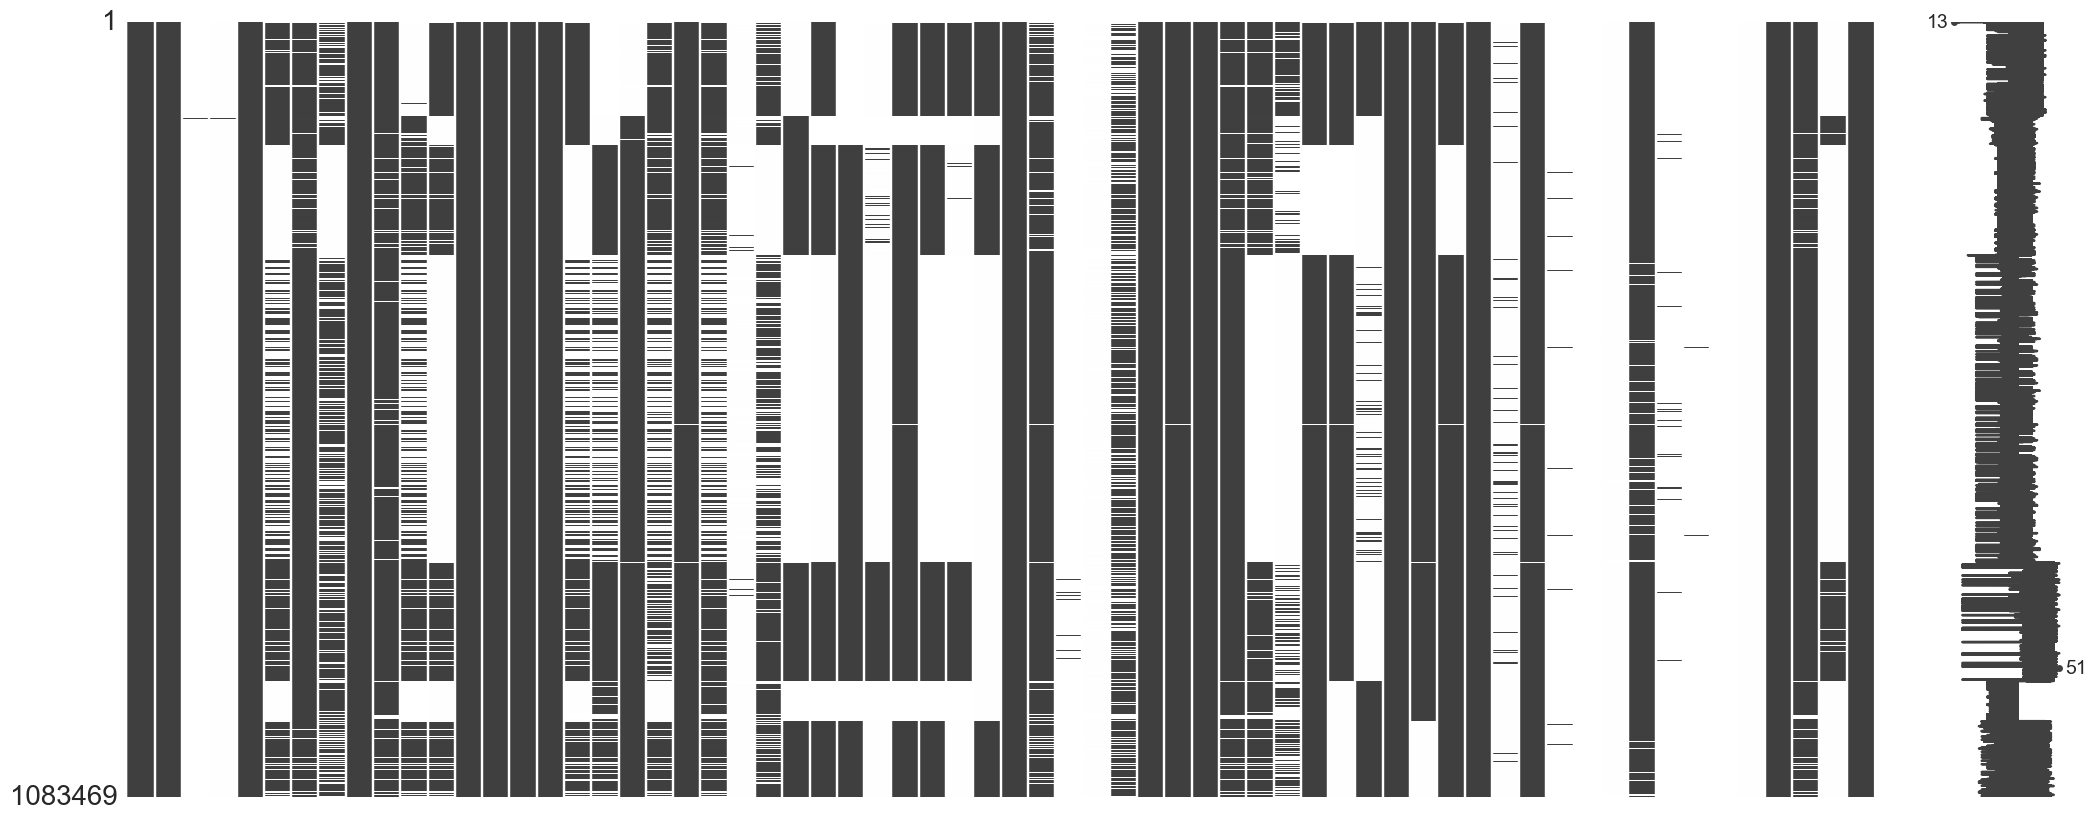

In [28]:
import missingno as msno

msno.matrix(gdf)

**OK looks like some columns are barely populated. Let's remove them.**

In [35]:
def delete_near_null(df, cols, populated_threshold=0.01):
    """iterate through columns and remove columns with almost null columns"""
    columns = df.columns.values
    for col in columns:
        # drop col if unique values is 1
        non_null_rows = df[col].count()
        total_rows = len(df[col])
        populated_ratio = non_null_rows/total_rows
        print('Columns Removed')
        if populated_ratio <= populated_threshold:
            del df[col]
            print(col)
    return df

In [34]:
column_list = list(gdf.select_dtypes(include=['object']).columns.values)
column_list.remove('geometry')
gdf = delete_near_null(gdf, column_list)

AGPRE_ENRD
AGPRE_EXPD
LANDMARK
PREFIXTYPE
PREFIX_DIR
USE3_DESC
USE4_DESC
XUSE2_DESC
XUSE3_DESC
XUSE4_DESC


# Filtering on Geodesic Features

In [ ]:
# filter out 

# Geospatial Transformations

# Transforming Units of Measure

# Transforming Projections

# Geospatial Calculations

# Calculate Centroid

# Calculate Perimeter

# Calculate Distance between Points

# Joins / Merges

In [37]:
# enough about taxes
file = './data/shp_water_lakes_rivers.zip'

z = zipfile.ZipFile(file)
for name in z.namelist():
    z.extract(name,"./data/")

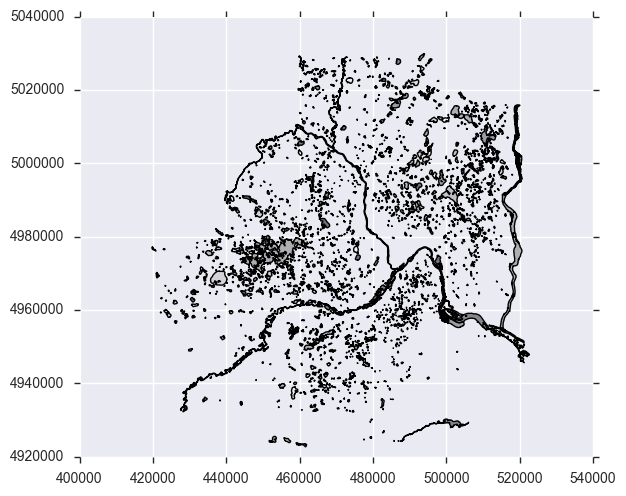

In [45]:
shp_file = './data/LakesAndRivers.dbf'

water_df = gpd.read_file(shp_file).set_index(['OWF_ID']).sort_index()
water_df.plot()

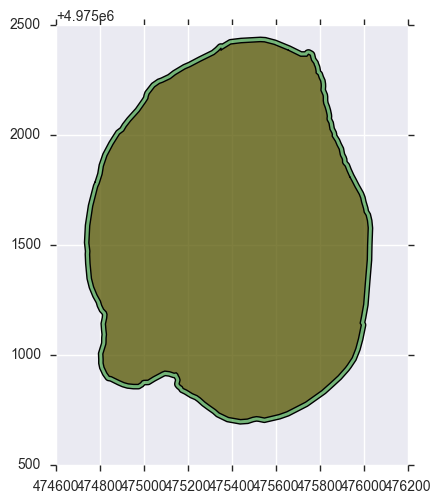

In [73]:
# lake calhoun
lake_calhoun = water_df[water_df.NAME_DNR == 'Calhoun']

# get the 60m surounding lake calhoun
buffered_lake_calhoun = lake_calhoun.buffer(50)
ax = lake_calhoun.plot(color='red');

buffered_lake_calhoun.plot(ax=ax, color='green');

In [77]:
buffered_water_df = water_df.copy()
buffered_water_df['geometry'] = buffered_water_df.buffer(10)

In [80]:
# filter out points
gdf = gdf[gdf.geom_type != 'Point']

In [ ]:
# find properties adjacent to lake calhoun
res_union = gpd.overlay(buffered_water_df, gdf, how='union')

In [53]:
res_union.plot()

AttributeError: 'Polygon' object has no attribute 'plot'

# Joining Tablular Data to Geospatial Data

# Joining Geospatial Data Sets Together

# Writing Data Out